First, click the file folder icon on the left and upload the winequality-white.csv file. Then run the function defined all the way at the bottom. Then you should be able to run any relevent sections to reproduce results.

In [93]:
from sklearn import tree
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix


In [94]:
data = pd.read_csv("winequality-white.csv",sep=";")
param_dict = {"criterion":["gini","entropy"],"max_depth":range(3,25),"min_samples_split":range(1,5),"min_samples_leaf":range(1,50)}
#data = data.drop(columns="density")
#data


In [18]:
trainPct = .8
leaf_size = 45
train_size = int(trainPct * (len(data.index)))
maxdepth = 3

Decision Tree. 

In [95]:
y = data.iloc[:,11].to_numpy()


x = data.iloc[:,:11].to_numpy()

In [46]:



for i in range(1,9):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i/10, random_state=42)
  clf = tree.DecisionTreeClassifier()
  clf = clf.fit(x_train, y_train)
  predicts = clf.predict(x_test)
  print("Test Set at " + str(i))
  print(metrics.accuracy_score(y_test,predicts))
  predicts = clf.predict(x_train)
  print("Train set at " + str(i))
  print(metrics.accuracy_score(y_train,predicts))
  


Test Set at 1
0.6061224489795919
Train set at 1
1.0
Test Set at 2
0.6061224489795919
Train set at 2
1.0
Test Set at 3
0.5925170068027211
Train set at 3
1.0
Test Set at 4
0.5545918367346939
Train set at 4
1.0
Test Set at 5
0.5549203756635361
Train set at 5
1.0
Test Set at 6
0.5222864920040831
Train set at 6
1.0
Test Set at 7
0.49431321084864394
Train set at 7
1.0
Test Set at 8
0.47818321000255165
Train set at 8
1.0


In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=42)
grid = GridSearchCV(clf,param_grid=param_dict,cv=10,verbose=1,n_jobs=-1)
grid.fit(x_train,y_train)


Fitting 10 folds for each of 8624 candidates, totalling 86240 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 2760 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 6760 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 12360 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 19560 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 28360 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 38760 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 50760 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 64360 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 79560 tasks      | elapsed: 18.8min
[Parallel(n_jobs=-1)]: Done 86240 out of 86240 | elapsed: 21.1min f

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [71]:
grid.best_params_


{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

0
0.6306122448979592
[[  0   0   0   3   0   0   0]
 [  1   5   9   3   0   0   0]
 [  0   3  97  39   4   1   0]
 [  0   2  37 144  26   5   1]
 [  1   2   6  25  56   4   0]
 [  0   0   0   3   6   7   0]
 [  0   0   0   0   0   0   0]]


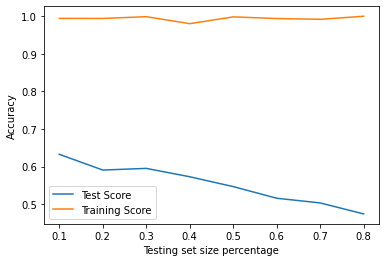

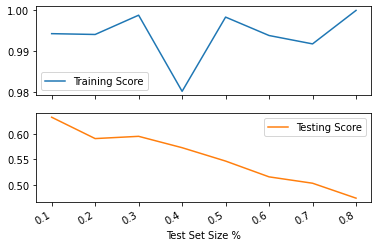

In [32]:
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_leaf=1,min_samples_split=2)

generateStats(clf,x,y)

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=42)
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_leaf=1,min_samples_split=2)
clf = clf.fit(x_train, y_train)
predicts = clf.predict(x_test)
print(metrics.accuracy_score(y_test,predicts))
print(confusion_matrix(y_test,predicts))
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
predicts = clf.predict(x_test)
print(metrics.accuracy_score(y_test,predicts))

0.636734693877551
[[  0   0   0   3   0   0]
 [  1   5   8   4   0   0]
 [  0   5  96  36   5   2]
 [  0   2  36 151  20   6]
 [  1   2   5  29  53   4]
 [  0   0   0   3   6   7]]
0.6163265306122448


Loop through multiple values for min_samples_leaf and record accuracy scores on training and test data for learning rates, then graph it.

In [38]:
learningrate = pd.DataFrame(np.array(range(1,9)),columns=["Test Set Size %"])



,Test Set Size %
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8


In [39]:
results = np.zeros((2,8))
for i in range(1,9):
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i/10, random_state=42)
  clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_leaf=1,min_samples_split=2)
  clf = clf.fit(x_train, y_train)
  predicts = clf.predict(x_test)
  
  results[1][i-1] = (metrics.accuracy_score(y_test,predicts))
  predicts = clf.predict(x_train)
  
  results[0][i-1] = (metrics.accuracy_score(y_train,predicts))

#print(results)
learningrate['Training Score'] = results[0]
learningrate['Testing Score'] = results[1]
print(clf.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [41]:
learningrate['Test Set Size %'] = learningrate['Test Set Size %']*.1
learningrate

,Test Set Size %,Training Score,Testing Score
0,0.1,0.994328,0.634694
1,0.2,0.993364,0.591837
2,0.3,0.998833,0.593878
3,0.4,0.979918,0.576531
4,0.5,0.998775,0.547162
5,0.6,0.993874,0.518203
6,0.7,0.991831,0.495188
7,0.8,1.000000,0.472314


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6261b8550>,
      dtype=object)

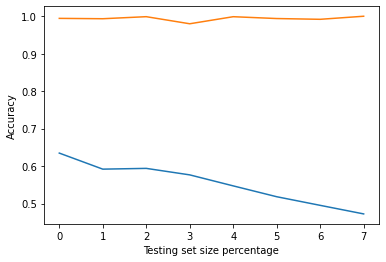

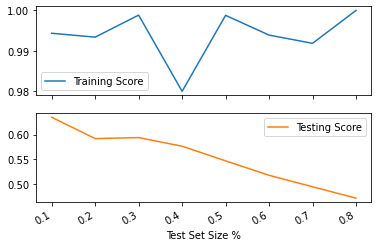

In [43]:


plt.plot(learningrate['Testing Score'])
plt.plot(learningrate['Training Score'])
plt.ylabel('Accuracy')
plt.xlabel("Testing set size percentage")
learningrate.plot(x='Test Set Size %',subplots=True)


Neural Nets:

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler 
param_dict = {'alpha':10.0 ** -np.arange(1, 7),'hidden_layer_sizes': range(4,12)}

In [15]:
scaler = StandardScaler()
scaler.fit(x_train)  
X_train = scaler.transform(x_train)  
X_test = scaler.transform(x_test) 

NameError: ignored

In [90]:

 
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(12,2), random_state=1)

clf.fit(X_train, y_train)
grid = GridSearchCV(clf,param_grid=param_dict,cv=10,verbose=1,n_jobs=-1)
grid.fit(X_train,y_train)




/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  4.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=1e-05,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(12, 2),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=1, shuffle=True,
                                     solver='lbfgs', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'a

In [91]:
grid.best_params_

{'alpha': 0.001, 'hidden_layer_sizes': 9}

In [93]:
predicts = clf.predict(X_test)
print(metrics.accuracy_score(y_test,predicts))
confusion_matrix(y_test,predicts)


clf = MLPClassifier(solver='lbfgs', alpha=.001,hidden_layer_sizes=9, random_state=1,max_iter=5000)
clf.fit(X_train, y_train)
predicts = clf.predict(X_test)
print(metrics.accuracy_score(y_test,predicts))



0.5510204081632653
0.5469387755102041


2
0.563265306122449
[[  1   0   3   3   0   0   0]
 [  0   0  26  12   2   0   0]
 [  1   5 250 161   8   0   1]
 [  3   1 135 467  62   0   0]
 [  0   0   8 161 110   1   0]
 [  0   0   0  24  25   0   0]
 [  0   0   0   0   0   0   0]]


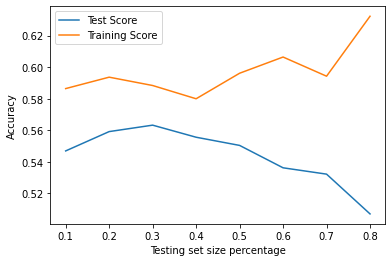

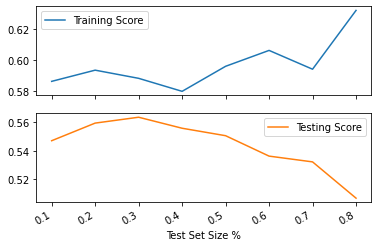

In [34]:
clf = MLPClassifier(solver='lbfgs', alpha=.001,hidden_layer_sizes=9, random_state=1,max_iter=5000)
generateStats(clf,x,y,ann=True)

KNN model


In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

In [74]:
scores = np.zeros(20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=42)

In [78]:
for i in range(1,20):
  print(i)
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(x_train, y_train)
  predicts = neigh.predict(x_test)
  scores[i] = (metrics.accuracy_score(y_test,predicts))
print(scores.argmax())


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1


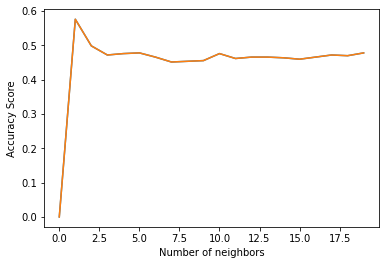

In [76]:
plt.plot(scores)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy Score")
plt.plot(scores)

In [83]:
neigh = KNeighborsClassifier(n_neighbors=1, leaf_size=40)
neigh.fit(x_train, y_train)
predicts = neigh.predict(x_test)
print(metrics.accuracy_score(y_test,predicts))


0.5755102040816327


1
0.5785714285714286
[[  1   0   2   1   1   0]
 [  1   6  10   6   2   0]
 [  1  11 164  95  18   2]
 [  1   7  80 277  55  12]
 [  0   5  21  55 102   9]
 [  0   0   1  10   7  17]]


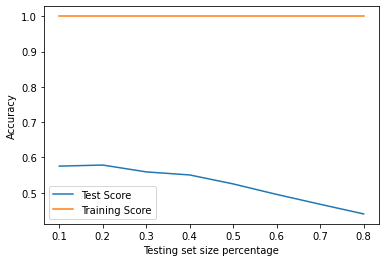

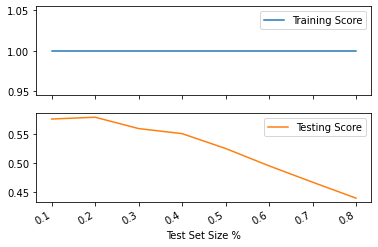

In [84]:
neigh = KNeighborsClassifier(n_neighbors=1)
generateStats(neigh,x,y)

Boosting


In [96]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [97]:
param_dict = {"n_estimators":range(30,150,10),"learning_rate":np.arange(1,10)*.1}

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=42)
clf = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=4),n_estimators=100, random_state=0)
grid = GridSearchCV(clf,param_grid=param_dict,cv=10,verbose=1,n_jobs=-1)
grid.fit(x_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 15.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=4,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
   

In [100]:
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 30}

In [101]:
clf = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=4),learning_rate = 0.1, n_estimators=30, random_state=0)
clf.fit(x_train, y_train)
predicts = clf.predict(x_test)
print(metrics.accuracy_score(y_test,predicts))


0.4959183673469388


5
0.5341953045253488
[[  0   1   1  10   0   0]
 [  0   4  47  35   1   0]
 [  0   2 438 409   8   0]
 [  0   0 245 971 103   0]
 [  0   0  15 388 155   0]
 [  0   0   1  65  38   2]]


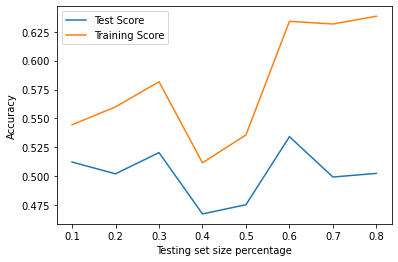

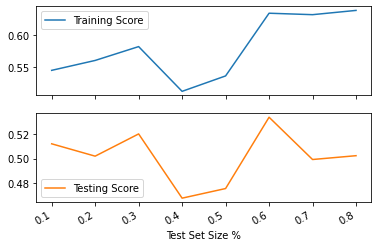

In [104]:
clf = AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=4),learning_rate = 0.1, n_estimators=150, random_state=0,)
generateStats(clf,x,y)

Support Vector Machine

In [7]:
from sklearn import svm

In [37]:
param_dict = {"kernal":["linear", "poly", "rbf", "sigmoid", "precomputed"],}

3
0.5372448979591836
[[  1   1   3   3   0   0]
 [  1   8  20  24   0   0]
 [  0   7 218 352   1   0]
 [  1   1  80 782  22   1]
 [  0   1   6 310  43   7]
 [  0   0   0  51  15   1]]


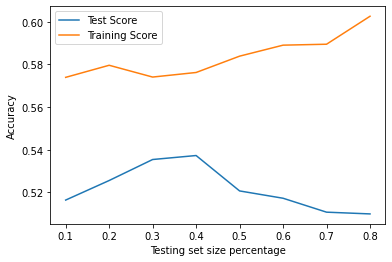

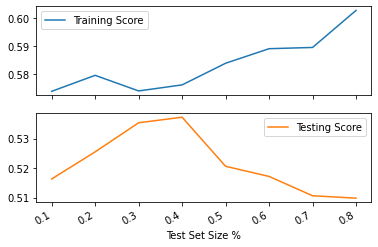

In [113]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=42)
clf = svm.SVC(kernel="poly",degree=3)
generateStats(clf,x,y,ann=True)


1
0.6561224489795918
[[  0   0   0   5   0   0]
 [  0   3   1  21   0   0]
 [  0   1 148 141   1   0]
 [  0   0  31 388  13   0]
 [  0   0   2  98  92   0]
 [  0   0   1  18   4  12]]


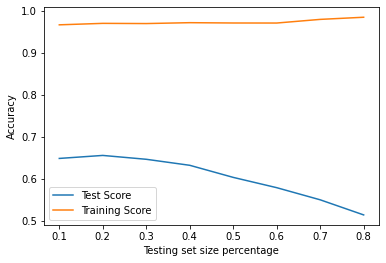

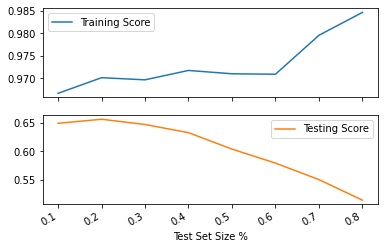

In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=42)
clf = svm.SVC(kernel="rbf",gamma=1.5)
generateStats(clf,x,y,ann=True)

In [31]:
def generateStats(classifier, x, y, ann = False):
  learningrate = pd.DataFrame(np.array(range(1,9)),columns=["Test Set Size %"])
  results = np.zeros((2,8))
  for i in range(1,9):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i/10, random_state=42)
    #clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=20,min_samples_leaf=1,min_samples_split=2)
    if ann == True:
      scaler = StandardScaler()
      scaler.fit(x_train)  
      x_train = scaler.transform(x_train)  
      x_test = scaler.transform(x_test) 
    classifier1 = classifier.fit(x_train, y_train)
    predicts = classifier1.predict(x_test)
    
    results[1][i-1] = (metrics.accuracy_score(y_test,predicts))
    predicts = classifier1.predict(x_train)
    
    results[0][i-1] = (metrics.accuracy_score(y_train,predicts))

  #print(results)
  learningrate['Training Score'] = results[0]
  learningrate['Testing Score'] = results[1]
  #print(clf.get_params())
  learningrate['Test Set Size %'] = learningrate['Test Set Size %']*.1
  plt.plot(learningrate['Test Set Size %'],learningrate['Testing Score'],label='Test Score')
  plt.plot(learningrate['Test Set Size %'],learningrate['Training Score'],label='Training Score')
  plt.ylabel('Accuracy')
  plt.xlabel("Testing set size percentage")
  plt.legend()
  learningrate.plot(x='Test Set Size %',subplots=True)
  best = np.array(learningrate['Testing Score']).argmax()
  print(best)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=(best+1)/10, random_state=42)
  if ann == True:
      scaler = StandardScaler()
      scaler.fit(x_train)  
      x_train = scaler.transform(x_train)  
      x_test = scaler.transform(x_test)
  clf = classifier.fit(x_train,y_train)
  predicts = clf.predict(x_test)
  print(metrics.accuracy_score(y_test,predicts))
  print(confusion_matrix(y_test,predicts))
  